**Importar-Librerias**

In [1]:
from scipy.stats import kstest, norm
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene
from itertools import combinations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Cargar datos**

In [12]:
datos = pd.read_excel("/content/drive/MyDrive/curso-est/corte-2/datos/datos_restaurante.xlsx")
datos.head()

,Compra,Propina,Cliente,Casada,Dia,Jornada,Grupo
0,82401.5,4898.5,Mujer,No,Miercoles,Noche,2
1,50149.0,8051.0,Hombre,No,Miercoles,Noche,3
2,101898.5,16975.0,Hombre,No,Miercoles,Noche,3
3,114848.0,16053.5,Hombre,No,Miercoles,Noche,2
4,119261.5,17508.5,Mujer,No,Miercoles,Noche,4


**Comprobar supuestos**

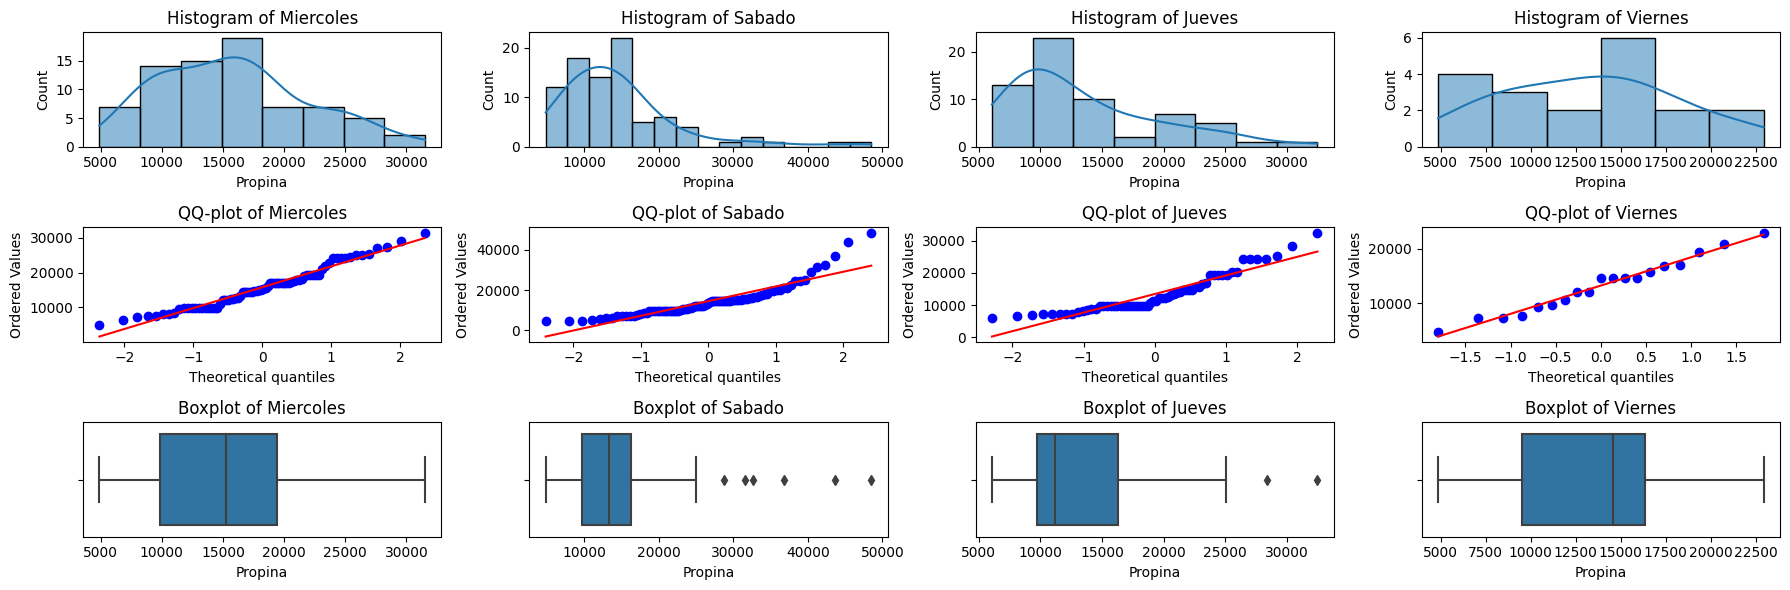

In [13]:
unique_groups = datos['Dia'].unique()

plt.figure(figsize=(18, 6))
for i, group in enumerate(unique_groups):
    plt.subplot(3, len(unique_groups), i+1)
    sns.histplot(datos[datos['Dia'] == group]['Propina'], kde=True)
    plt.title(f'Histogram of {group}')

    plt.subplot(3, len(unique_groups), len(unique_groups) + i+1)
    stats.probplot(datos[datos['Dia'] == group]['Propina'], plot=plt)
    plt.title(f'QQ-plot of {group}')

    plt.subplot(3, len(unique_groups), 2*len(unique_groups) + i+1)
    sns.boxplot(x=datos[datos['Dia'] == group]['Propina'])
    plt.title(f'Boxplot of {group}')

plt.tight_layout()
plt.show()

**PRUEBA SHAPIRO**

In [14]:
unique_groups = datos['Dia'].unique()
shapiro_results = {}
for group in unique_groups:
    _, p_value = stats.shapiro(datos[datos['Dia'] == group]['Propina'])
    shapiro_results[group] = round(p_value, 4)

print("Valores p de la prueba de Shapiro para cada grupo:")
for group, p_value in shapiro_results.items():
    print(f"  - Grupo {group}: {p_value}")

Valores p de la prueba de Shapiro para cada grupo:
  - Grupo Miercoles: 0.0263
  - Grupo Sabado: 0.0
  - Grupo Jueves: 0.0
  - Grupo Viernes: 0.8497


**PRUEBA KOLMOGOROV**

In [15]:
ks_results = {}
for group in unique_groups:
    values = datos[datos['Dia'] == group]['Propina']
    _, p_value = kstest(values, 'norm', args=(values.mean(), values.std()))
    ks_results[group] = round(p_value, 4)

print("Valores p de la prueba de Kolmogorov-Smirnov para cada grupo:")
for group, p_value in ks_results.items():
    print(f"  - Grupo {group}: {p_value}")

Valores p de la prueba de Kolmogorov-Smirnov para cada grupo:
  - Grupo Miercoles: 0.4236
  - Grupo Sabado: 0.0106
  - Grupo Jueves: 0.0171
  - Grupo Viernes: 0.871


**PRUEBA - HOMOCEDASTICIDAD - LEVENE**

In [16]:
unique_groups = datos['Dia'].unique()
group_values = [datos[datos['Dia'] == group]['Propina'].tolist() for group in unique_groups]
_, p_value = levene(*group_values)
p_value_rounded = round(p_value, 4)
p_value_rounded

print(f"Valor p de la prueba de Levene para todos los grupos: {p_value_rounded}")

Valor p de la prueba de Levene para todos los grupos: 0.6473


**Prueba ANOVA**

In [17]:
# Ajustar el modelo
modelo = ols('Propina ~ C(Dia)', data=datos).fit()
resultado_anova = sm.stats.anova_lm(modelo)
print(resultado_anova)

             df        sum_sq       mean_sq         F    PR(>F)
C(Dia)      3.0  2.240724e+08  7.469078e+07  1.672355  0.173589
Residual  240.0  1.071889e+10  4.466203e+07       NaN       NaN


**Prueba Tukey**

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=datos['Propina'],  # Datos
                          groups=datos['Dia'],  # Grupos
                          alpha=0.05)  # Nivel de significancia

print(tukey.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
   Jueves Miercoles  2345.8478 0.1724  -613.0017 5304.6974  False
   Jueves    Sabado  1075.0114 0.7679 -1798.5709 3948.5937  False
   Jueves   Viernes  -178.0666 0.9996 -4711.7987 4355.6654  False
Miercoles    Sabado -1270.8364 0.6204 -3985.4834 1443.8106  False
Miercoles   Viernes -2523.9145 0.4558 -6958.6139  1910.785  False
   Sabado   Viernes  -1253.078 0.8806 -5631.3475 3125.1914  False
-----------------------------------------------------------------


**Boxplot**

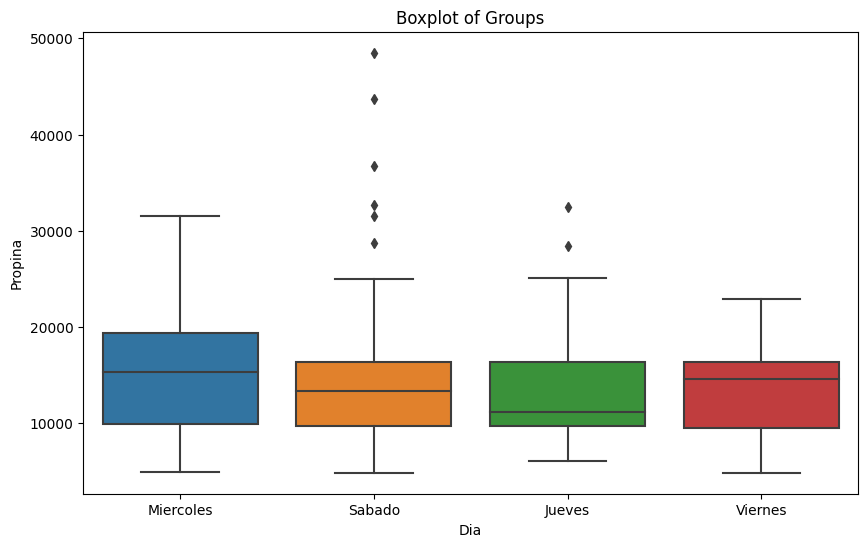

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dia', y='Propina', data=datos)
plt.title('Boxplot of Groups')
plt.xlabel('Dia')
plt.ylabel('Propina')
plt.show()